In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import find_peaks

def plot_fft_with_top_frequencies(filename, top_n=5, max_frequency=3000):
    # Read the wav file
    sample_rate, data = wavfile.read(filename)
    
    # If stereo, use only one channel
    if len(data.shape) > 1:
        data = data[:,0]

    # Apply FFT
    fft_result = fft(data)
    
    # Compute the magnitude
    magnitude = np.abs(fft_result)
    
    # Compute the frequency axis
    freq = np.fft.fftfreq(len(magnitude), 1/sample_rate)
    
    # Only take the positive half of the spectrum
    positive_freqs = freq[:len(freq)//2]
    positive_magnitude = magnitude[:len(magnitude)//2]
    
    # Find the peaks, with a minimum distance between them
    peak_indices, _ = find_peaks(positive_magnitude, distance=sample_rate/max_frequency)
    
    # Select top peaks
    top_indices = peak_indices[np.argsort(positive_magnitude[peak_indices])][-top_n:]
    top_freqs = positive_freqs[top_indices]
    top_magnitudes = positive_magnitude[top_indices]

    # Plot the FFT spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_magnitude, label='FFT Magnitude')
    plt.scatter(top_freqs, top_magnitudes, color='red', label='Top Frequencies')
    plt.title('FFT Spectrum with Top 5 Frequencies Highlighted')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.xlim(0, max_frequency) # Limit x-axis to 18 kHz
    plt.show()

    return top_freqs, positive_freqs, positive_magnitude

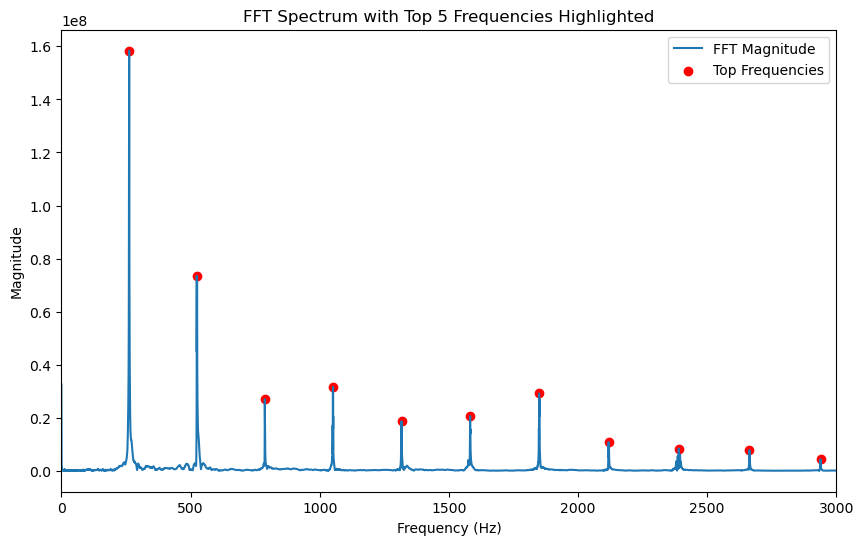

Top 5 frequencies: [ 262.22222222  524.          787.33333333 1051.55555556 1316.66666667
 1582.22222222 1849.11111111 2118.22222222 2390.         2663.11111111
 2938.44444444]


In [2]:
# Example usage
import os
top_freqs, positive_freqs, positive_magnitude = plot_fft_with_top_frequencies("/home/prab/Documents/notes/piano/C4.wav", top_n=11)
top_freqs.sort()
print("Top 5 frequencies:", top_freqs)

In [3]:
from model.bez2018model import get_ERB_cf_list
import matplotlib.pyplot as plt

cf_list = get_ERB_cf_list(num_cf=3500, min_cf=125, max_cf=16e3)


In [4]:
def find_closest_indices(to_find, to_find_in):
    closest_indices = []
    # For each number in to_find
    for number in to_find:
        # Compute the absolute difference with each number in to_find_in
        differences = [abs(number - x) for x in to_find_in]
        # Find the index of the smallest difference
        closest_index = differences.index(min(differences))
        closest_indices.append(closest_index)
    return closest_indices


closest_indices = find_closest_indices(top_freqs, cf_list)
closest_indices


[300, 691, 965, 1176, 1348, 1493, 1619, 1731, 1831, 1921, 2005]

In [5]:
for i in closest_indices:
    print(cf_list[i])

262.36021981713327
524.3793880749729
787.4753062141494
1051.191108199925
1316.0365000937325
1581.4421327084885
1848.8308489221067
2119.4915890415564
2390.8141975282583
2661.707236950096
2939.757758848585


In [6]:
import numpy as np
sponts = np.load("model/sponts.npy")

In [7]:
sponts[300]

array([ 66.4321608 ,   3.51758794,  63.2160804 ,   7.53768844,
         9.94974874,  93.66834171,  81.6080402 ,  63.2160804 ,
        68.14070352,   8.94472362,  61.80904523, 100.        ,
         8.94472362,  35.1758794 ,  58.69346734,  31.45728643,
        54.47236181,   1.40703518])

In [8]:
idcs = find_closest_indices([200, 400, 500, 600, 800], cf_list)
for i in idcs:
    # print(cf_list[i])
    print(positive_magnitude[i] / 1e8)

0.0008523933356621004
0.002704242640085073
0.0021241902443943548
0.0023321284316948705
0.009596932270742493


In [9]:
idcs

[176, 526, 661, 779, 976]